<a href="https://colab.research.google.com/github/IsmaelMorante/celsiusToFahrenheitTensorFlow/blob/master/celsiusToFahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dataset de entrenamiento
celsius = np.array([-40, -10, 0, 8, 15, 22, 38, 50, 58, -20], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100, 122, 136.4, -4], dtype=float)

In [3]:
# Configuracion de Keras 1 capa
# capa = tf.keras.layers.Dense(units=1, input_shape=[1])
# modelo = tf.keras.Sequential([capa])

# Configuracion de Keras 3 capas
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [4]:
# Definicion del modelo y su aprendizaje
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [6]:
# Entrenamiento del modelo
print('Entrenamiento')
historial = modelo.fit(celsius, fahrenheit, epochs=2000, verbose=False)
print('Entrenamiento finalizado')


Entrenamiento
Entrenamiento finalizado


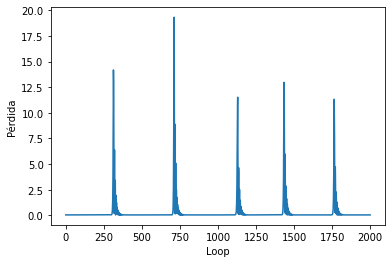

In [7]:
# Visionado de perdida en el entrenamiento
plt.xlabel("Loop")
plt.ylabel("Pérdida")
plt.plot(historial.history['loss'])

In [8]:
# Comporbacion de resultados
resultado = modelo.predict([100.0])
print("Resultado " + str(resultado) + " fahrenheit")

Resultado [[211.90994]] fahrenheit


In [9]:
# Visionado del modelo
# print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

[array([[-0.72379297, -0.47110027,  0.00306555]], dtype=float32), array([-5.6544666, -5.7816033, -4.989769 ], dtype=float32)]
[array([[ 0.13938284,  0.10132428,  1.2396396 ],
       [-0.18669152, -0.0055434 ,  0.89936906],
       [ 0.4381315 , -0.3018099 ,  0.25588462]], dtype=float32), array([-3.32239 ,  3.486556, -5.309371], dtype=float32)]
[array([[-0.22848041],
       [ 0.04110344],
       [-1.363277  ]], dtype=float32), array([4.968009], dtype=float32)]


In [11]:
# Exportacion del modelo
modelo.save('celsius_fahrenheit.h5')
!ls

celsius_fahrenheit.h5  sample_data


In [12]:
# Conversion mediante tensorflowJS
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 2.1 MB/s 


In [14]:
# Creado de fichero y conversion
!mkdir modelo_salida
!tensorflowjs_converter --input_format keras celsius_fahrenheit.h5 modelo_salida
!ls modelo_salida

mkdir: cannot create directory ‘modelo_salida’: File exists
2021-07-28 18:51:26.008948: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
group1-shard1of1.bin  model.json
